In [183]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt

In [33]:
dt = pd.read_csv("sudoku_dataset/sudoku.csv")
#dt

In [44]:
def create_dataframe(string):
    array = list(string)
    reshaped = np.reshape(array, (9,9))
    return pd.DataFrame(reshaped)

In [46]:
puz = create_dataframe(dt["quizzes"][0])
sol = create_dataframe(dt["solutions"][0])
print("quiz")
display(puz)
print("solution")
display(sol)

quiz


,0,1,2,3,4,5,6,7,8
0,0,0,4,3,0,0,2,0,9
1,0,0,5,0,0,9,0,0,1
2,0,7,0,0,6,0,0,4,3
3,0,0,6,0,0,2,0,8,7
4,1,9,0,0,0,7,4,0,0
5,0,5,0,0,8,3,0,0,0
6,6,0,0,0,0,0,1,0,5
7,0,0,3,5,0,8,6,9,0
8,0,4,2,9,1,0,3,0,0


solution


,0,1,2,3,4,5,6,7,8
0,8,6,4,3,7,1,2,5,9
1,3,2,5,8,4,9,7,6,1
2,9,7,1,2,6,5,8,4,3
3,4,3,6,1,9,2,5,8,7
4,1,9,8,6,5,7,4,3,2
5,2,5,7,4,8,3,9,1,6
6,6,8,9,7,3,4,1,2,5
7,7,1,3,5,2,8,6,9,4
8,5,4,2,9,1,6,3,7,8


In [112]:
from keras.utils import to_categorical

def preprocessing_data(data):
    array = [list(map(int,list(i))) for i in data]
    return to_categorical(array, num_classes=10)

In [285]:
epochs = 10
batch = 32
train_size = 10000
test_size = 10000

In [286]:
x_train = preprocessing_data(dt["quizzes"][:train_size])
y_train = preprocessing_data(dt["solutions"][:train_size])

x_test = preprocessing_data(dt["quizzes"][train_size:train_size+test_size])
y_test = preprocessing_data(dt["solutions"][train_size:train_size+test_size])

print(y_train.shape)
# print(y_train)

(10000, 81, 10)


In [308]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Dropout, BatchNormalization

model = Sequential()
model.add(Reshape((810,), input_shape=x_train.shape[1:]))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(units=810, activation='softmax'))
model.add(Reshape((81,10)))
model.add(BatchNormalization(axis=2))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.50, epochs=epochs, batch_size=batch)

score = model.evaluate(x_test, y_test, batch_size=batch)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_100 (Reshape)        (None, 810)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 810)               656910    
_________________________________________________________________
reshape_101 (Reshape)        (None, 81, 10)            0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 81, 10)            40        
Total params: 656,950
Trainable params: 656,930
Non-trainable params: 20
_________________________________________________________________
Train on 5000 samples, validate on 5000 samples
Epoch 1/10
5000/5000 [==============================] - 4s 879us/step - loss: 7.8294 - acc: 0.1146 - val_loss: 8.0845 - val_acc: 0.1197
Epoch 2/10
5000/5000 [==============================] - 3s 573us/step - loss: 8.215

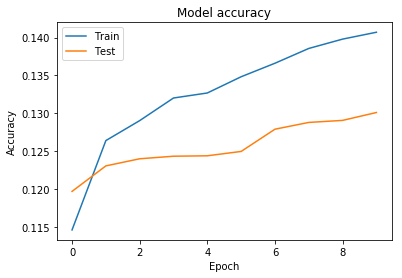

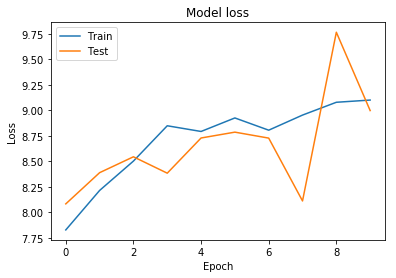

In [309]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [310]:
x = [np.argmax(i) for i in x_test[0]]
y = [np.argmax(i) for i in y_test[0]]

p = model.predict(x_test[0].reshape(1,81,10))
p = p.reshape((81,10))
p = [np.argmax(i) for i in p]

puz = create_dataframe(x)
sol = create_dataframe(y)
pre = create_dataframe(p)

print("quiz")
display(puz)
print("solution")
display(sol)
print("predicted")
display(pre)

quiz


,0,1,2,3,4,5,6,7,8
0,6,0,9,5,0,1,0,2,0
1,0,1,5,0,0,0,0,7,0
2,8,4,0,0,3,0,0,0,0
3,0,2,0,3,0,0,0,0,0
4,7,0,4,0,0,6,5,9,0
5,9,6,8,2,7,0,4,0,0
6,0,0,0,0,0,8,0,1,9
7,2,0,0,0,0,0,0,4,7
8,1,0,0,6,9,0,0,0,3


solution


,0,1,2,3,4,5,6,7,8
0,6,7,9,5,8,1,3,2,4
1,3,1,5,4,6,2,9,7,8
2,8,4,2,9,3,7,1,6,5
3,5,2,1,3,4,9,7,8,6
4,7,3,4,8,1,6,5,9,2
5,9,6,8,2,7,5,4,3,1
6,4,5,3,7,2,8,6,1,9
7,2,9,6,1,5,3,8,4,7
8,1,8,7,6,9,4,2,5,3


predicted


,0,1,2,3,4,5,6,7,8
0,6,4,2,7,6,4,6,4,9
1,3,4,9,4,6,9,6,9,9
2,2,4,4,2,1,4,5,6,6
3,9,2,5,4,9,2,2,9,5
4,5,5,9,2,9,6,4,2,5
5,3,4,9,5,5,2,9,6,6
6,9,9,9,5,2,2,4,9,2
7,2,2,5,4,9,2,9,4,9
8,2,6,2,5,9,1,4,4,9


In [311]:
p = model.predict(x_test[0].reshape(1,81,10))
p

array([[[ -1.44488230e-01,  -4.18145284e-02,   5.82329556e-02,
          -4.76675257e-02,   4.46814373e-02,   5.65653741e-02,
           7.57368654e-02,  -3.75793129e-02,  -7.86179677e-03,
           3.56362462e-02],
        [ -1.61327481e-01,  -5.90215623e-02,   4.55991998e-02,
          -9.53825563e-03,   6.47825152e-02,   5.38619794e-02,
           5.25241718e-02,  -3.46420892e-02,  -1.62553526e-02,
           5.49567640e-02],
        [ -1.71420708e-01,   3.11031938e-04,   5.20463139e-02,
          -4.43482250e-02,   4.01925370e-02,   3.93181890e-02,
           4.74353805e-02,  -3.01367193e-02,   3.64156067e-03,
           4.36793715e-02],
        [ -1.68631926e-01,  -6.20205104e-02,   5.01625836e-02,
          -3.80224437e-02,   3.93370502e-02,   4.01877128e-02,
           4.21876647e-02,   6.39533922e-02,  -1.89067181e-02,
           4.52150963e-02],
        [ -1.62095323e-01,  -4.43267785e-02,   5.50310202e-02,
          -4.21799347e-02,   5.06905466e-02,   4.62957770e-02,
      